In [479]:
# Nessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc

# Save file
results_file = './write/csanz-raw.h5ad'

# Open project
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

# Imported from fpkm table
adata = sc.read("csanz2018-raw.h5ad")
adata

scanpy==1.2.2 anndata==0.6.4 numpy==1.14.3 scipy==1.1.0 pandas==0.23.0 scikit-learn==0.19.1 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


AnnData object with n_obs × n_vars = 1075 × 16839 
    obs: 'n_genes', 'n_counts', 'orig_ident', 'marker', 'prep_date', 'sort_date', 'MergedGFP', 'percent_mito', 'S_Score', 'G2M_Score', 'Phase', 'old_ident', 'CC_seurat', 'CC_cyclone', 'res_1', 'Main_Groups'
    var: 'gene.mean', 'gene.dispersion', 'gene.dispersion.scaled'
    obsm: 'X_pca', 'X_tsne', 'X_tsne3d'

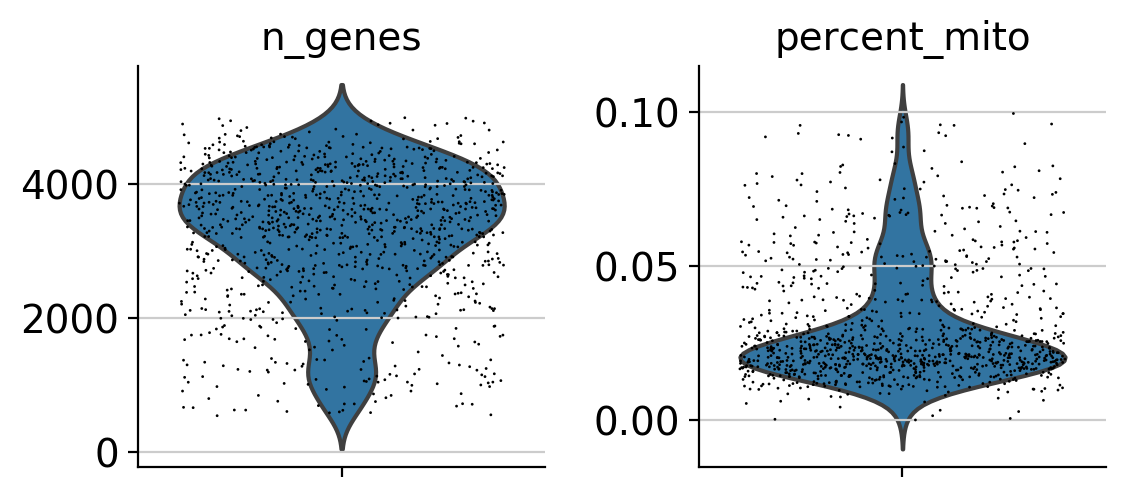

In [480]:
sc.pl.violin(adata, ['n_genes', 'percent_mito'],
             jitter=0.4, multi_panel=True)

In [481]:
adata.raw = sc.pp.log1p(adata, copy=True)

In [482]:
sc.pp.recipe_zheng17(adata)

running recipe zheng17
    finished (0:00:00.38)


In [483]:
sc.tl.pca(adata)
sc.pp.pca(adata)

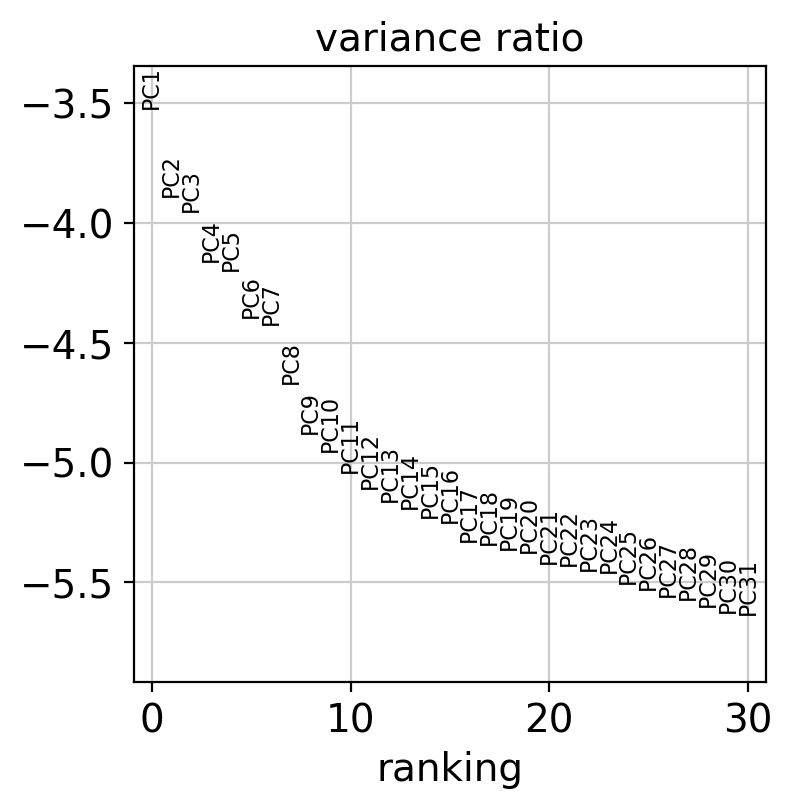

In [484]:
sc.pl.pca_variance_ratio(adata, log=True)

In [485]:
# Adjusted to 15 PC's - better results
sc.pp.neighbors(adata, n_pcs=15)

computing neighbors
    using 'X_pca' with n_pcs = 15
    finished (0:00:00.31) --> added to `.uns['neighbors']`
    'distances', weighted adjacency matrix
    'connectivities', weighted adjacency matrix


In [486]:
sc.tl.umap(adata)

computing UMAP
    finished (0:00:02.98) --> added
    'X_umap', UMAP coordinates (adata.obsm)


In [487]:
sc.tl.louvain(adata)

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00.05) --> found 7 clusters and added
    'louvain', the cluster labels (adata.obs, categorical)


In [488]:
sc.tl.paga(adata)

running partition-based graph abstraction (PAGA)
    finished (0:00:00.03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


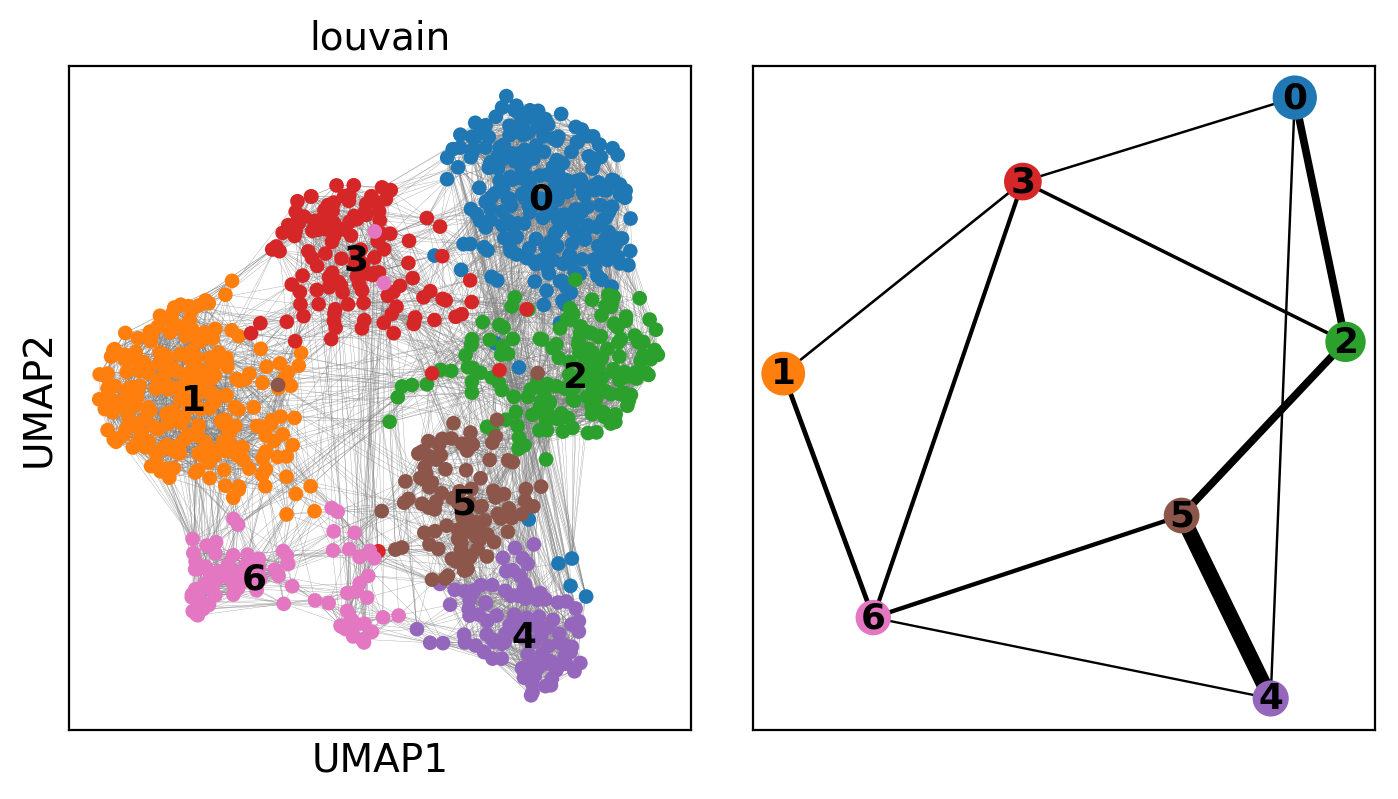

In [489]:
sc.pl.paga_compare(adata, threshold=0.1, basis='umap')

In [490]:
gene_names = ['Vim','Pax6','Hes6','Neurod6']

saving figure to file ./figures/violin.pdf


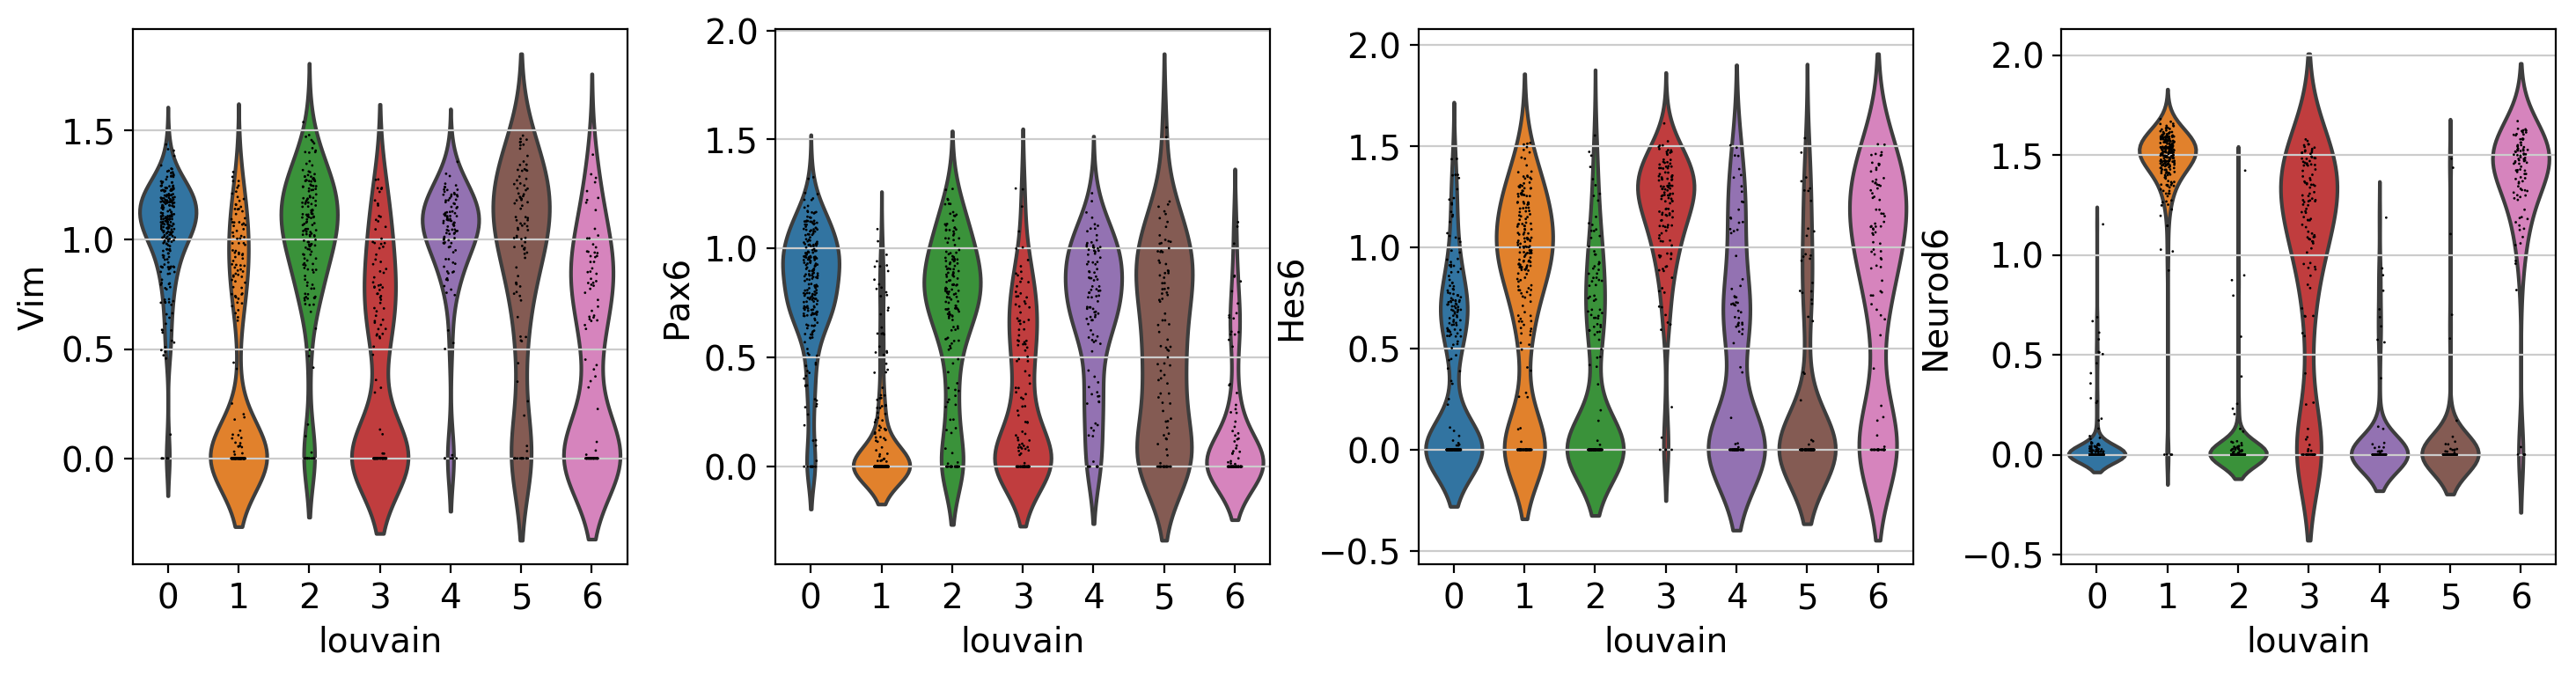

In [491]:
sc.pl.violin(adata, gene_names, groupby="louvain", save=True)

--> added 'pos', the PAGA positions (adata.uns['paga'])


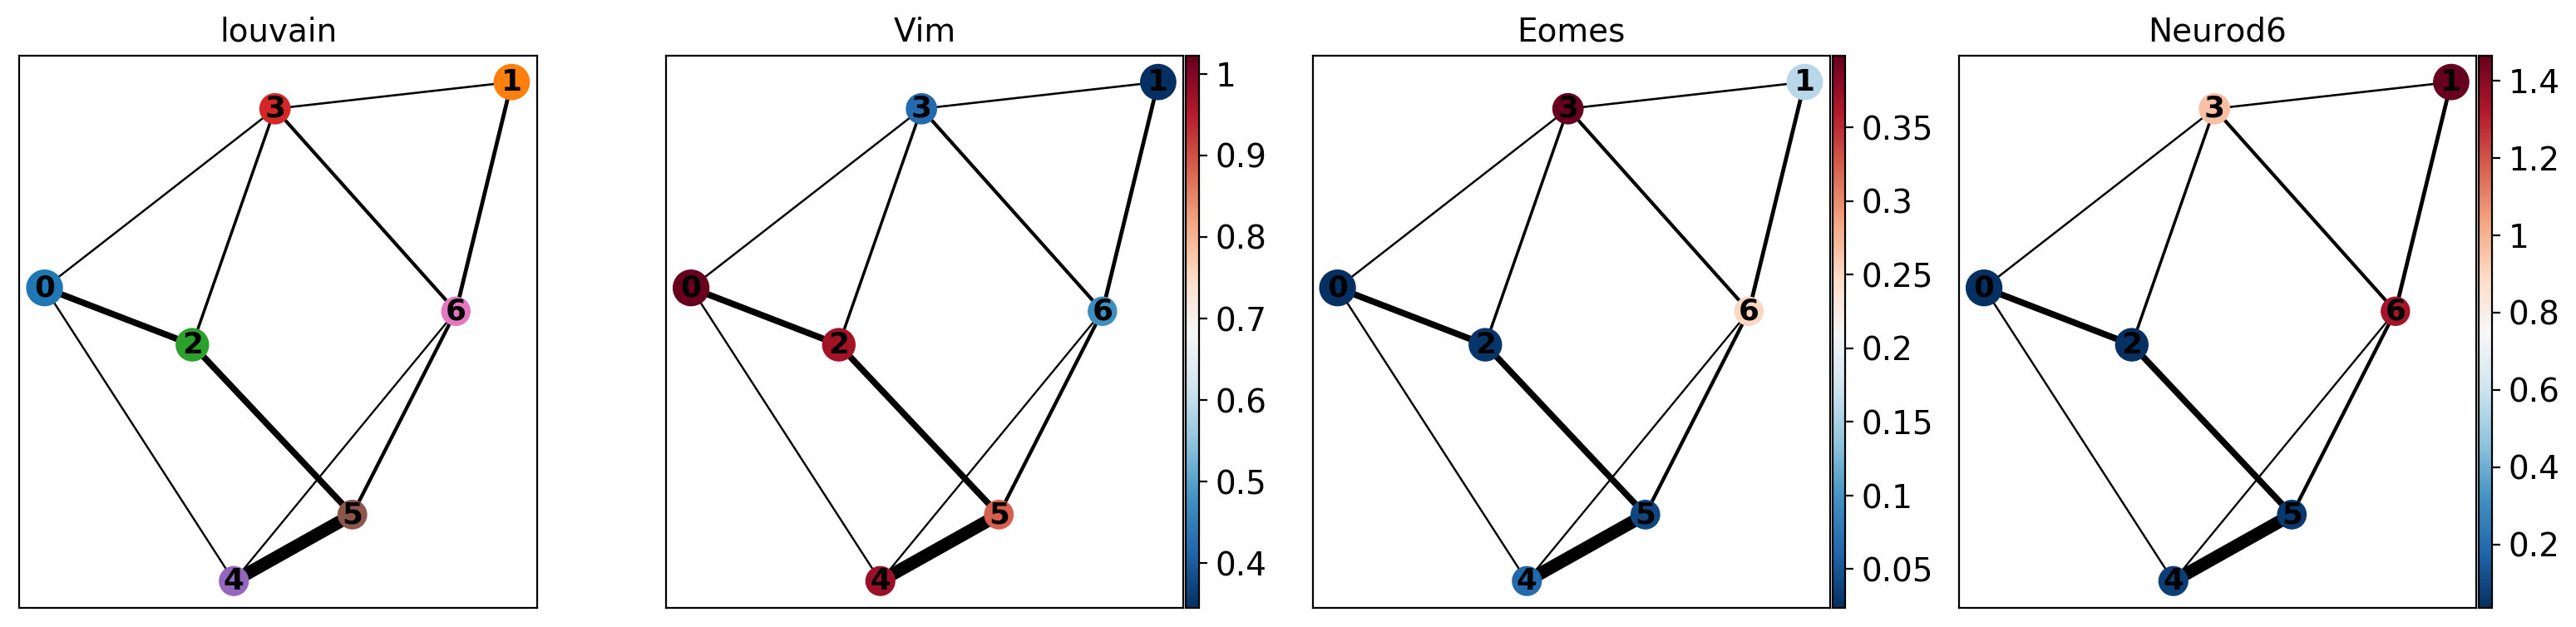

In [492]:
sc.pl.paga(adata, color=['louvain', 'Vim', 'Eomes', 'Neurod6'], threshold=0.1)

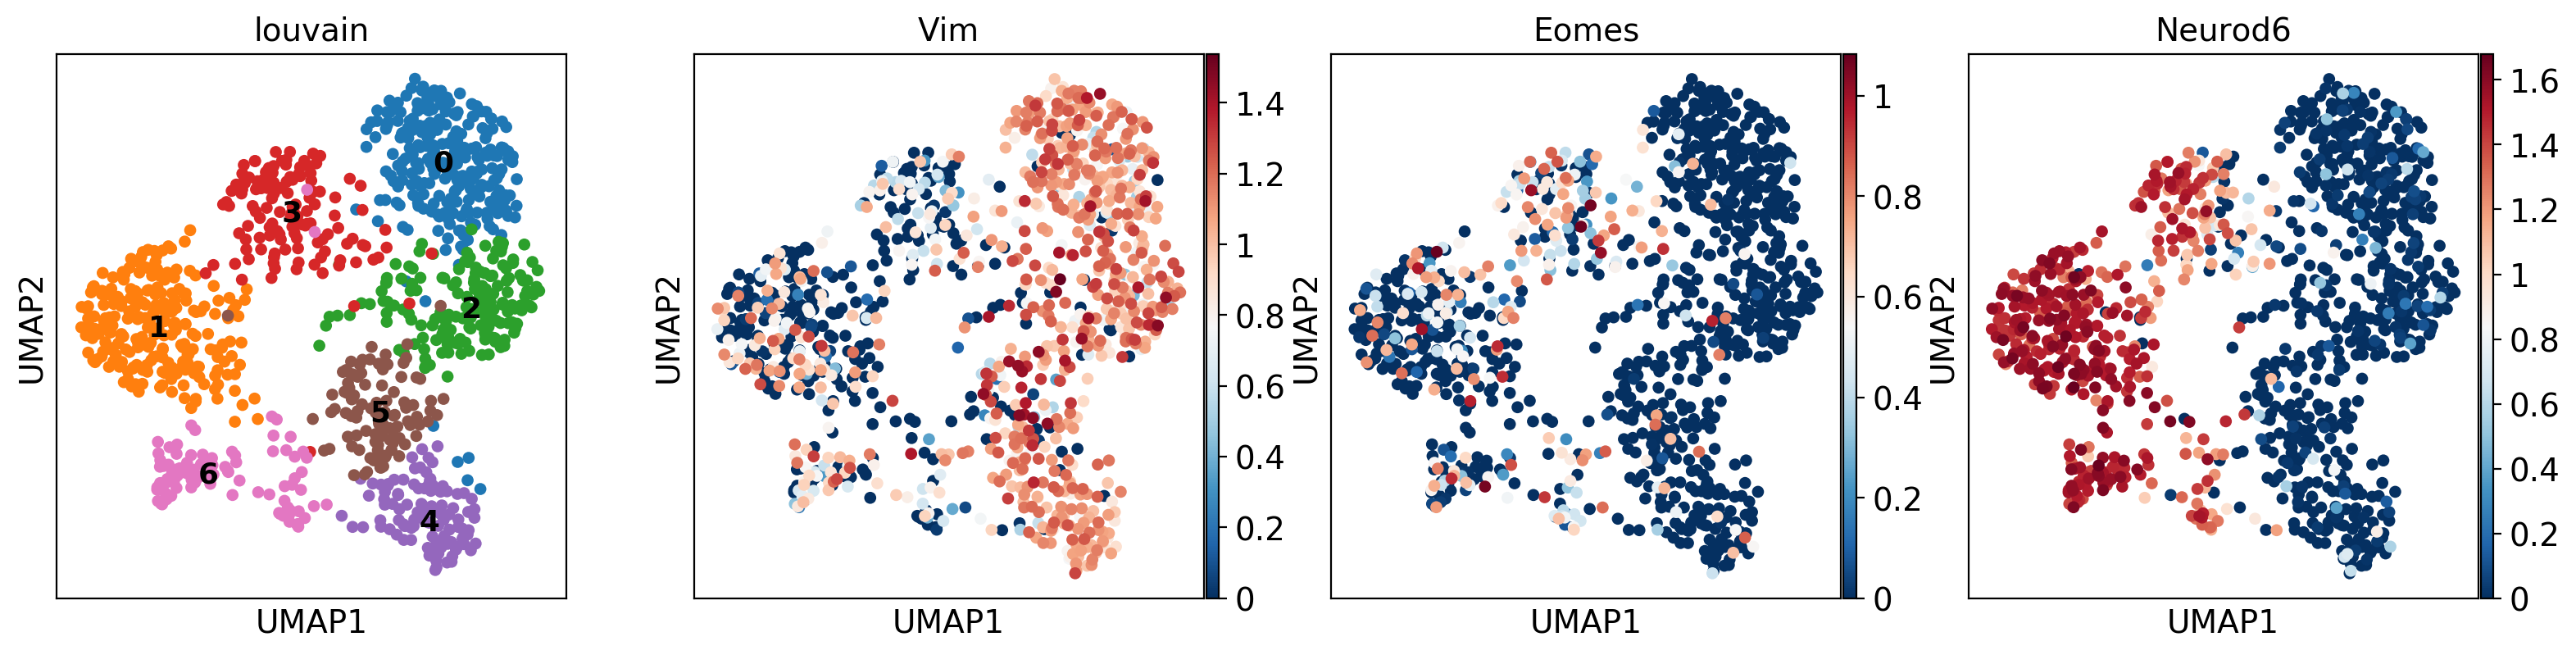

In [493]:
# Benchmark genes
sc.pl.umap(adata, color=['louvain', 'Vim', 'Eomes', 'Neurod6'], legend_loc='on data')

In [4]:
# Nessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy.api as sc

adata=sc.read("write/csanz-raw.h5ad")

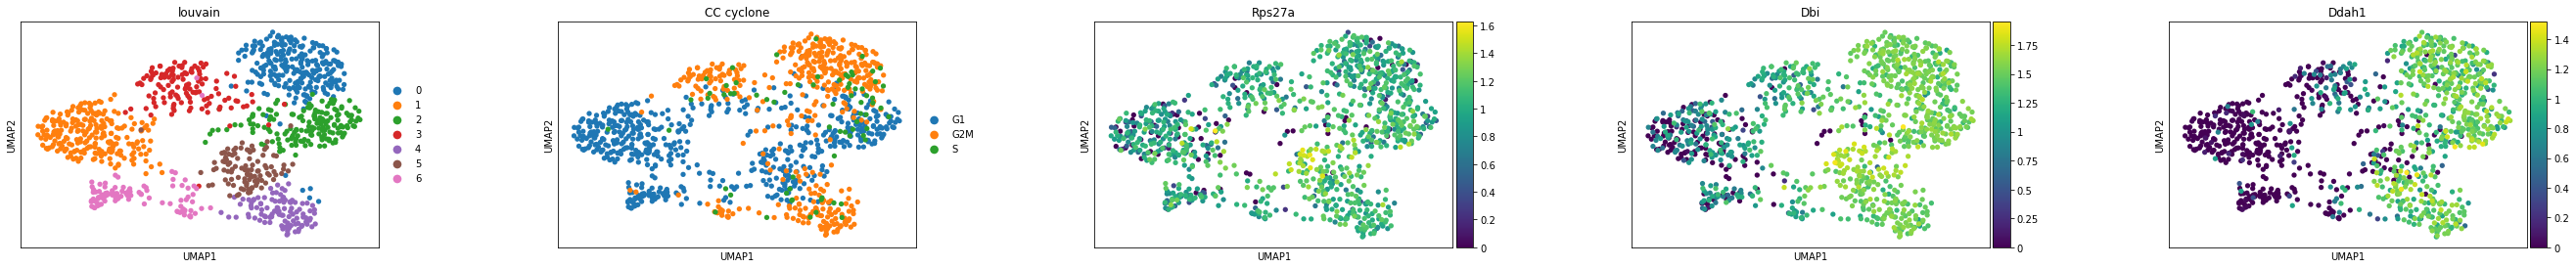

In [7]:
sc.pl.umap(adata, color=['louvain','CC_cyclone','Rps27a','Dbi','Ddah1'])

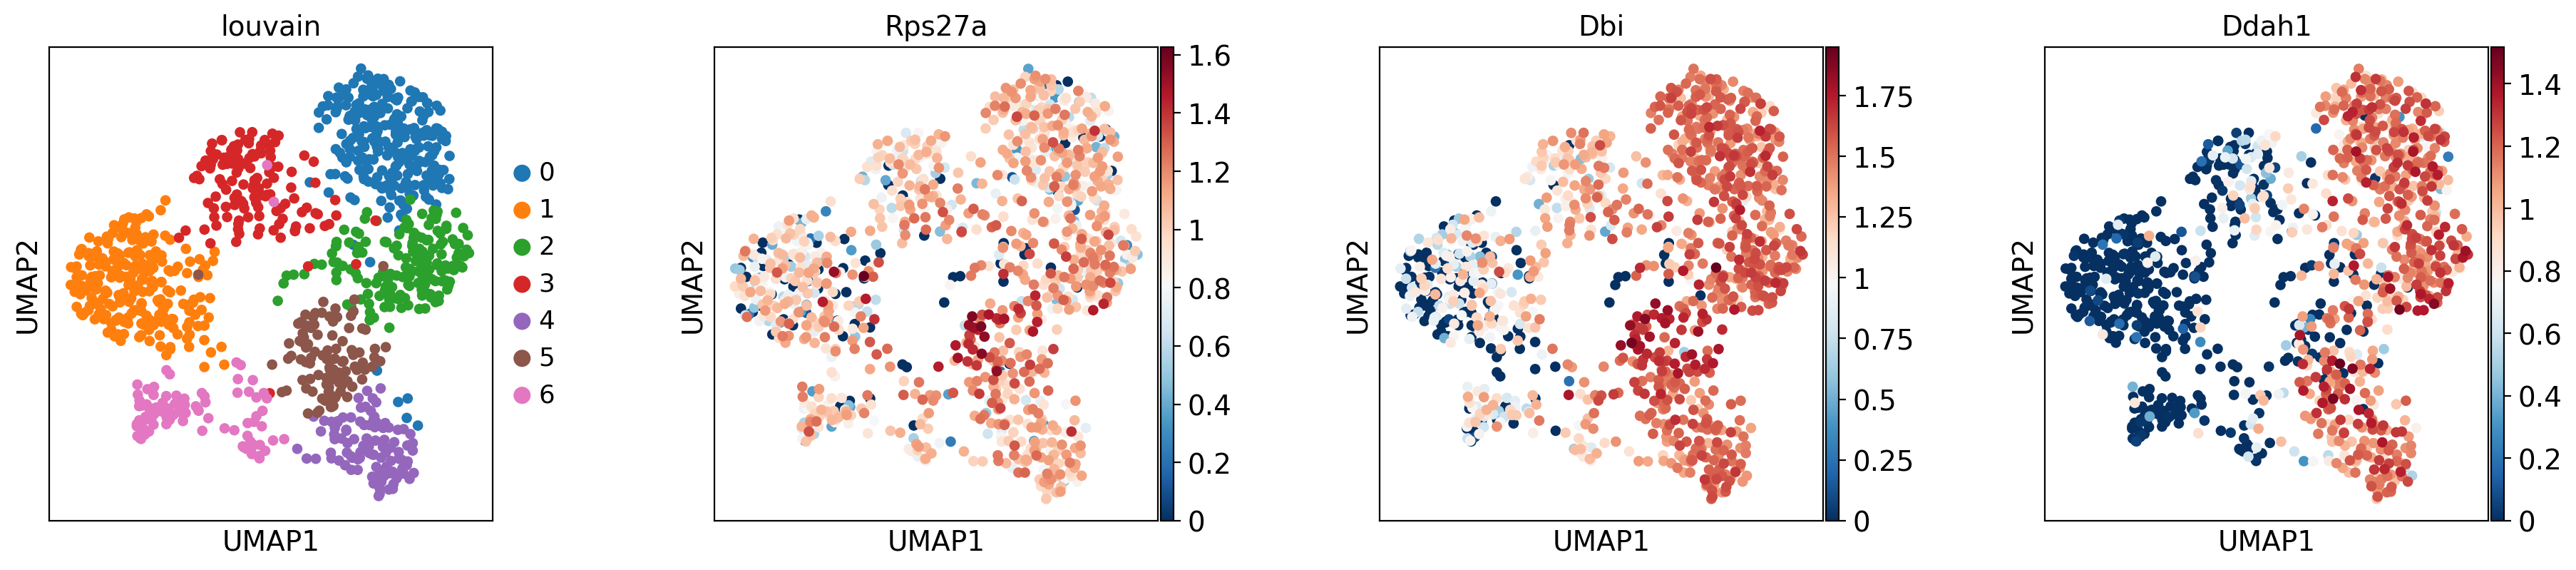

In [494]:
# Genes related to cluster 5
sc.pl.umap(adata, color=['louvain','Rps27a','Dbi','Ddah1'])

In [495]:
adata.obs['clusters'] = adata.obs['louvain']

In [496]:
adata.obs['louvain'].cat.categories

Index(['0', '1', '2', '3', '4', '5', '6'], dtype='object')

In [497]:
adata.obs['clusters'].cat.categories = [
    '0/RPs', '1/ENs', '2/RPs', '3/IPCs', '4/RPs', '5/RPs', '6/ENs']

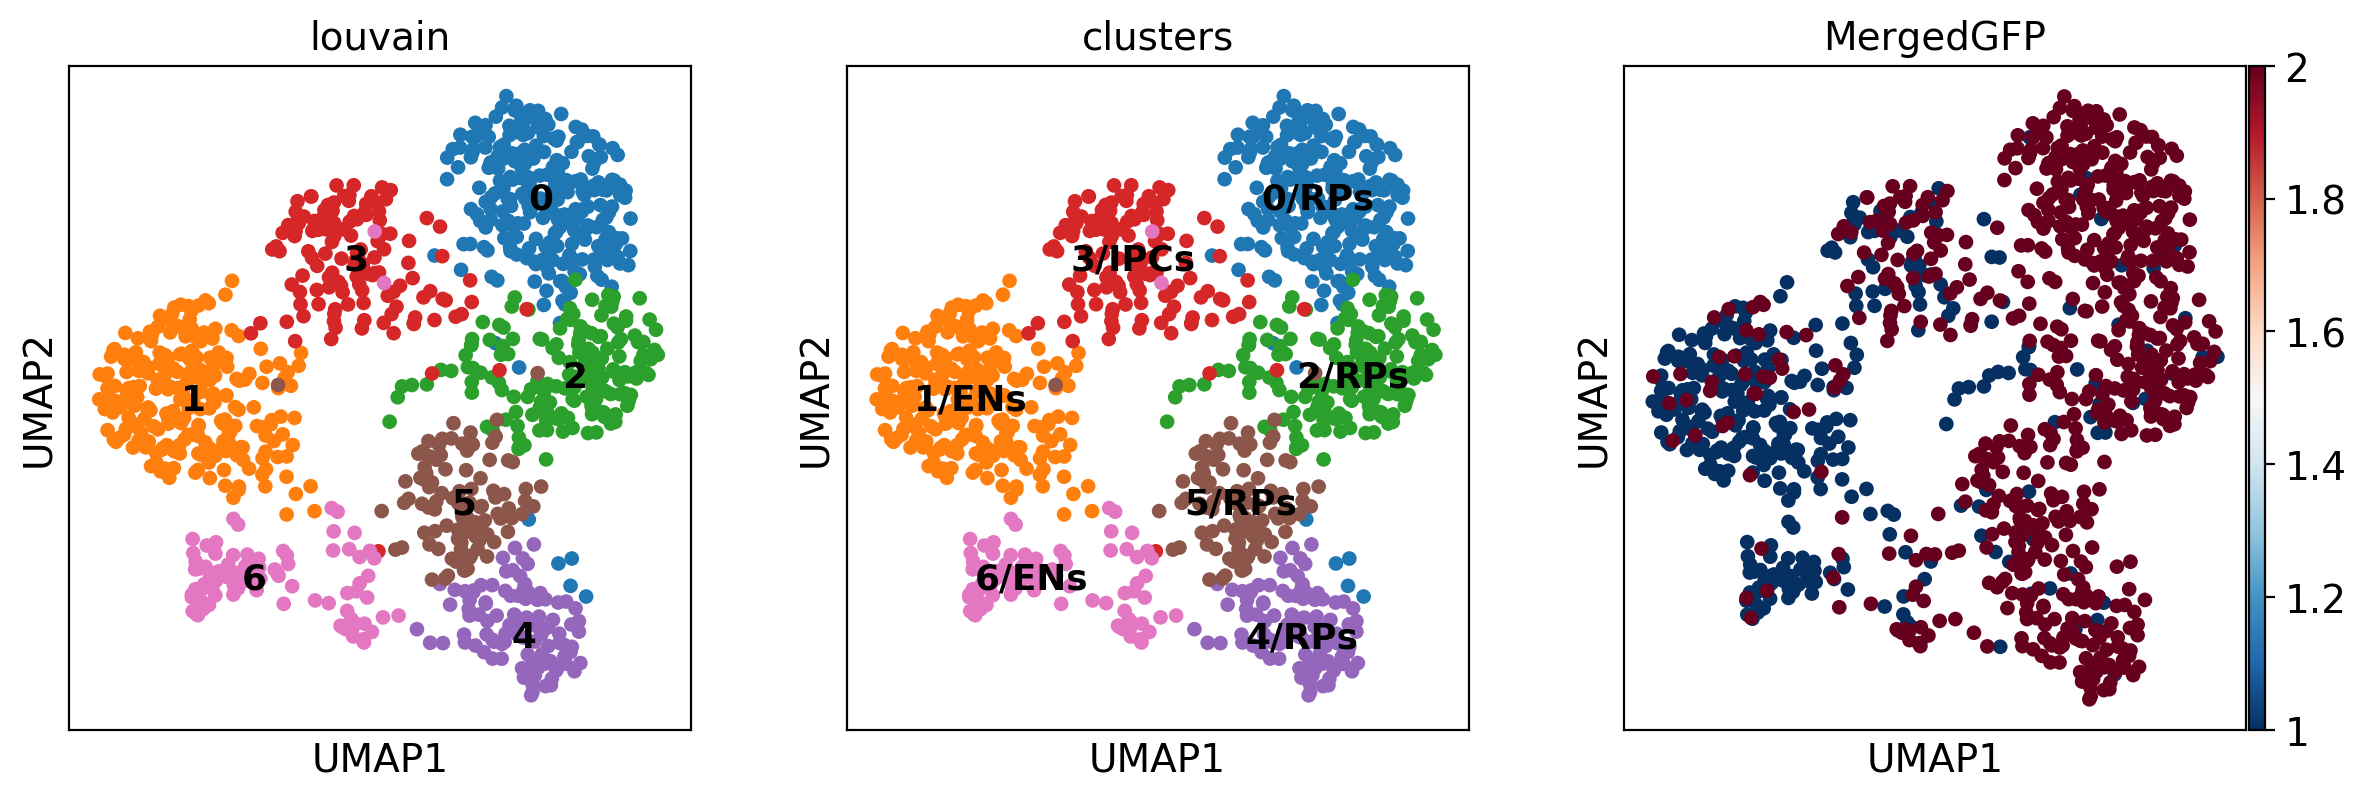

In [498]:
# Groups
sc.pl.umap(adata, color=['louvain', 'clusters','MergedGFP'], legend_loc='on data')

In [499]:
adata.write(results_file)

ranking genes
    finished (0:00:00.50) --> added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
saving figure to file ./figures/rank_genes_groups_clusters.pdf


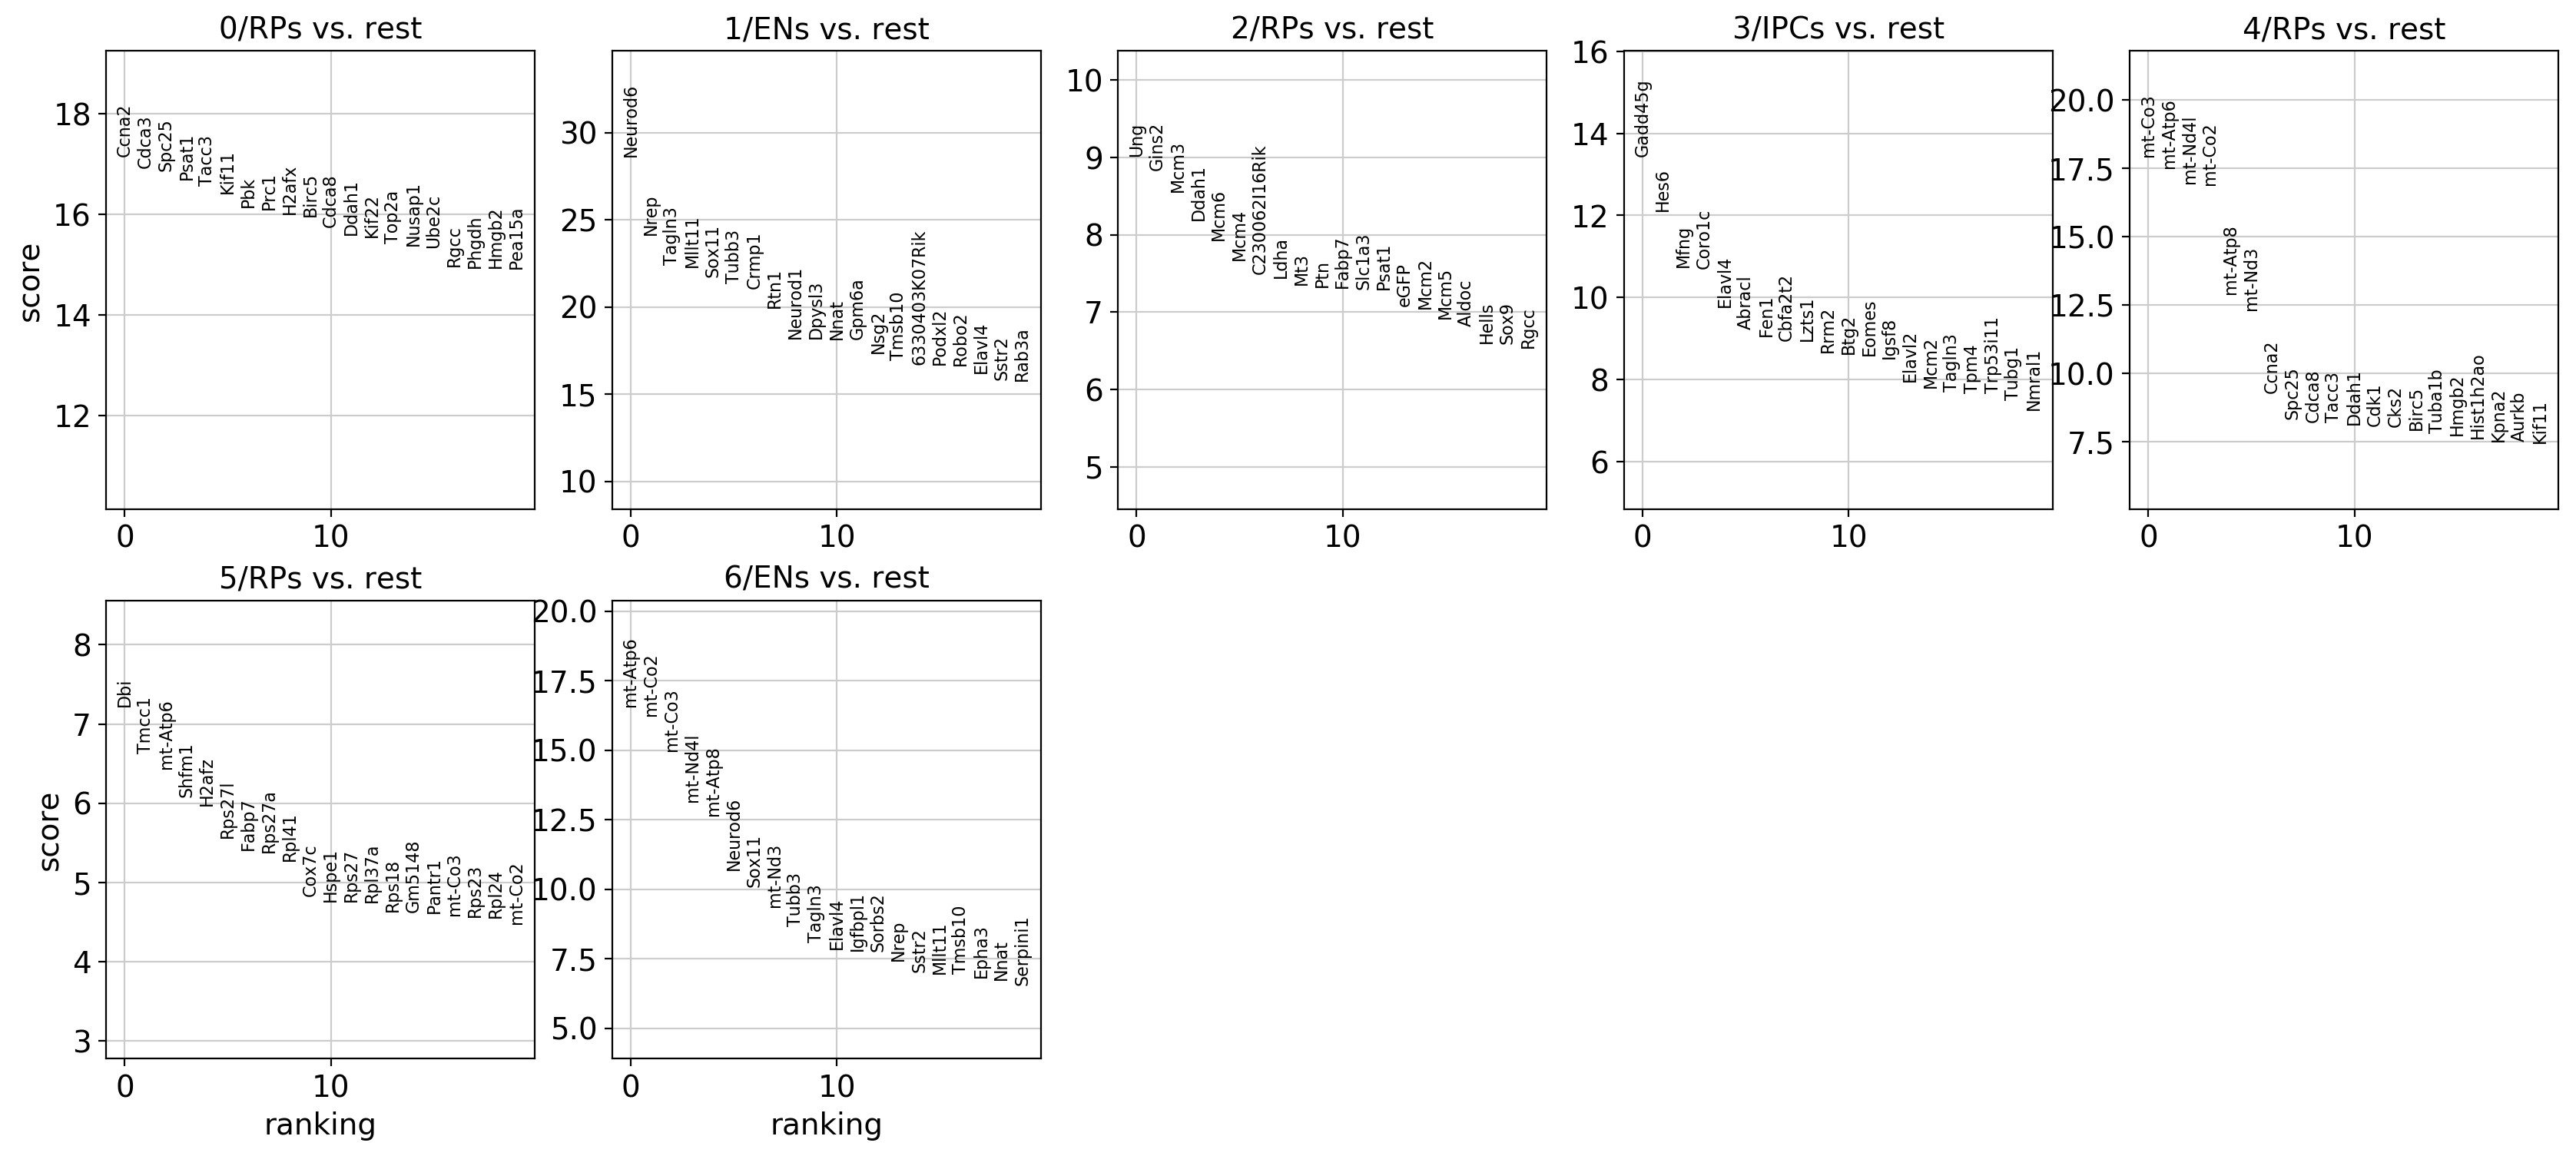

In [500]:
# Find markers
adata = sc.read(results_file)
sc.tl.rank_genes_groups(adata, 'clusters')
sc.pl.rank_genes_groups(adata, n_genes=20, save='.pdf')
adata.write(results_file)

In [501]:
# Plot using Fruchterman-Reingold algorithm
sc.tl.draw_graph(adata)

drawing single-cell graph using layout "fa"
    finished (0:00:04.36) --> added
    'X_draw_graph_fa', graph_drawing coordinates (adata.obsm)


saving figure to file ./figures/draw_graph_fa.pdf


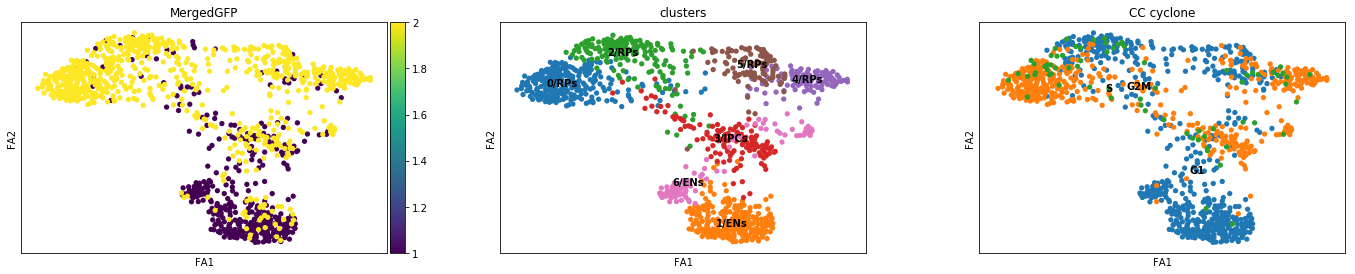

In [9]:
# Louvain clusters and GFP+ marker
# Obs: Red = Hes5-eGFP+ and Blue = CAG-mRFP+
sc.pl.draw_graph(
    adata, color=['MergedGFP','clusters','CC_cyclone'],
    legend_loc='on data',
    save=True)

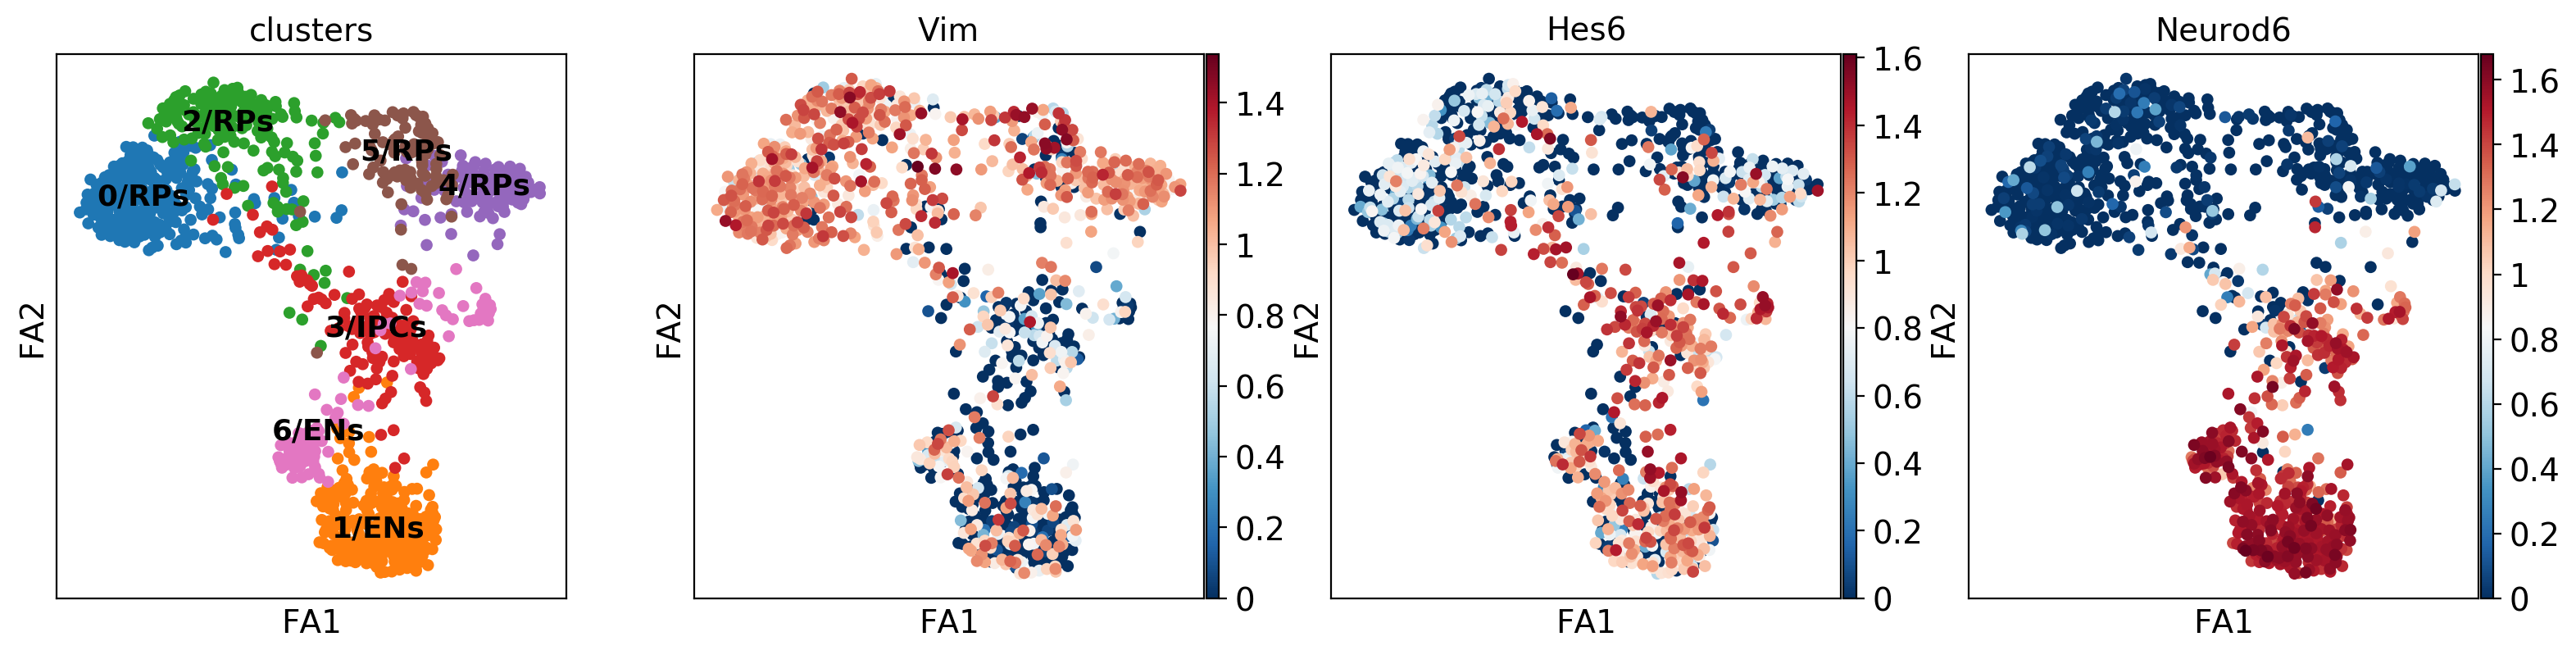

In [503]:
# Benchmark genes
sc.pl.draw_graph(adata, color=['clusters', 'Vim', 'Hes6', 'Neurod6'], legend_loc='on data')

running partition-based graph abstraction (PAGA)
    finished (0:00:00.03) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
--> added 'pos', the PAGA positions (adata.uns['paga'])


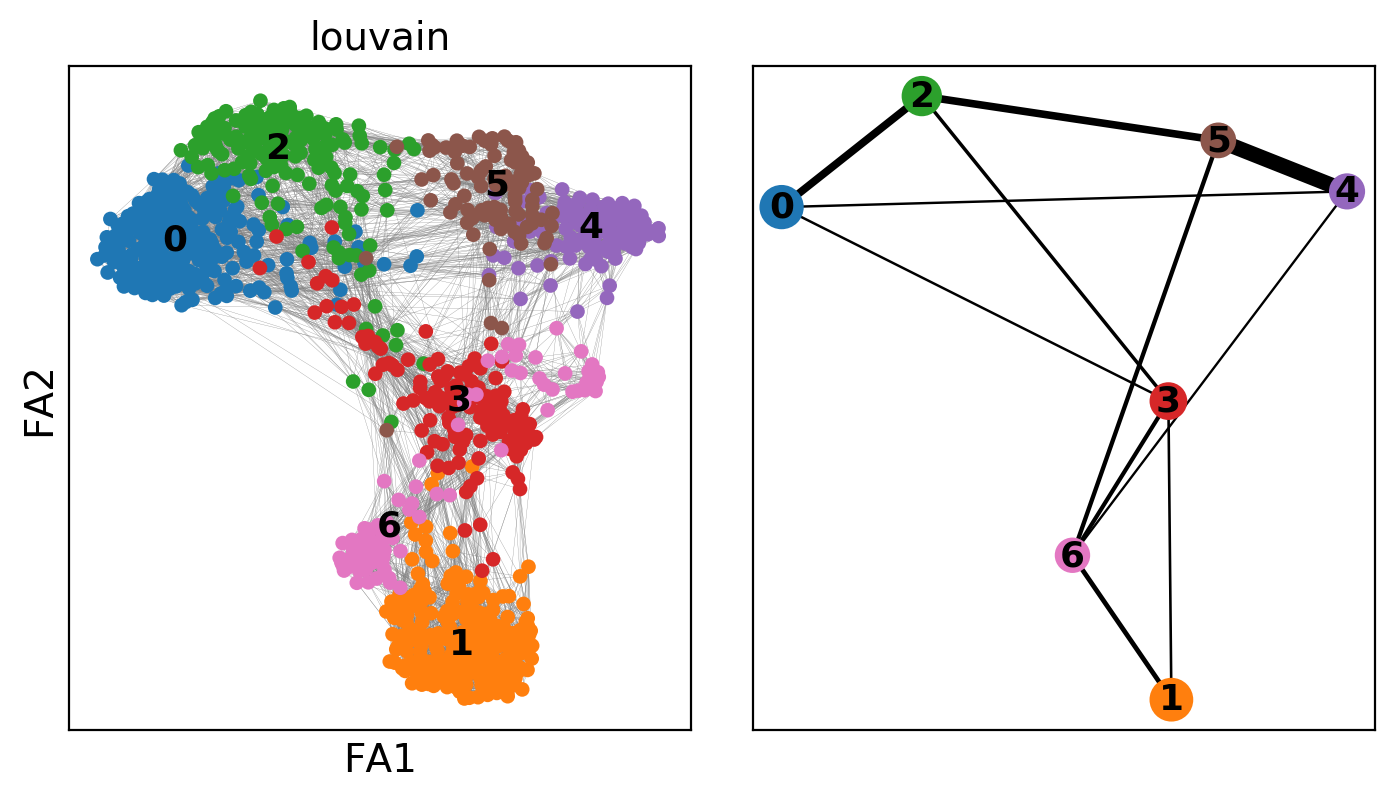

In [504]:
# PAGA
sc.tl.paga(adata)
sc.pl.paga_compare(
    adata, basis='X_draw_graph_fr', layout='rt', threshold_solid=0.1)

In [505]:
adata.write(results_file)

In [506]:
adata.uns['iroot'] = np.flatnonzero(adata.obs['louvain']  == '2')[0]

computing Diffusion Maps using n_comps=15(=n_dcs)
    eigenvalues of transition matrix
    [1.         0.9795814  0.954656   0.9452057  0.9345465  0.93121964
     0.9042911  0.89439946 0.8550955  0.83696645 0.8228851  0.81056017
     0.7983234  0.7917451  0.7873478 ]
    finished (0:00:00.08) --> added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns)
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00.00) --> added
    'dpt_pseudotime', the pseudotime (adata.obs)


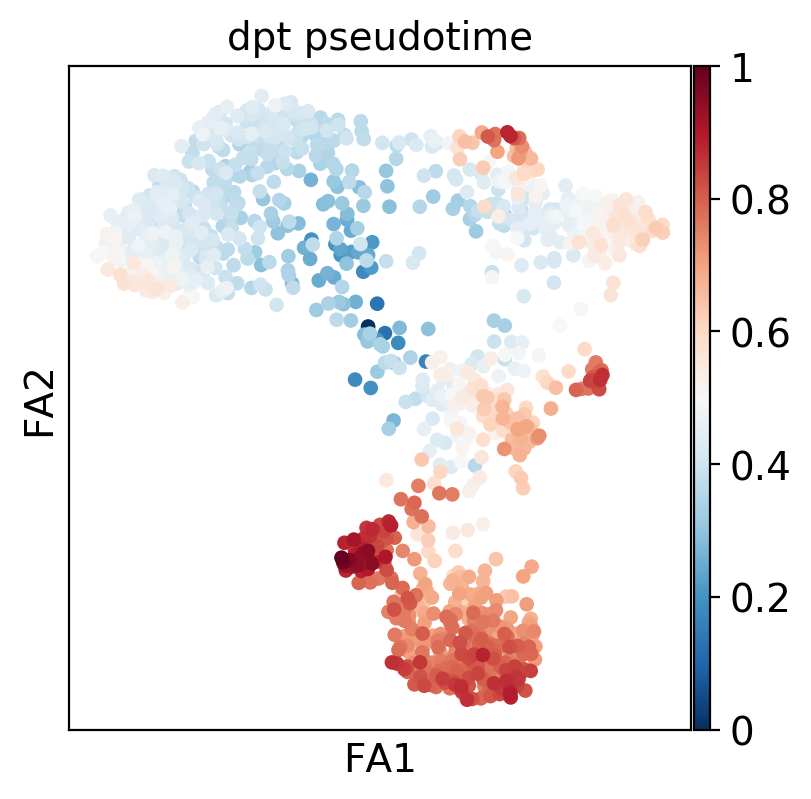

In [507]:
sc.tl.dpt(adata)
sc.pl.draw_graph(adata, color='dpt_pseudotime')

In [550]:
gene_names = ['Vim','Pax6',"Hes5",'Hes6',"Eomes","Tubb3",'Neurod6',"Tubb3",'Slc17a6','Sox11','Serpini1','Gad1','Gad2']

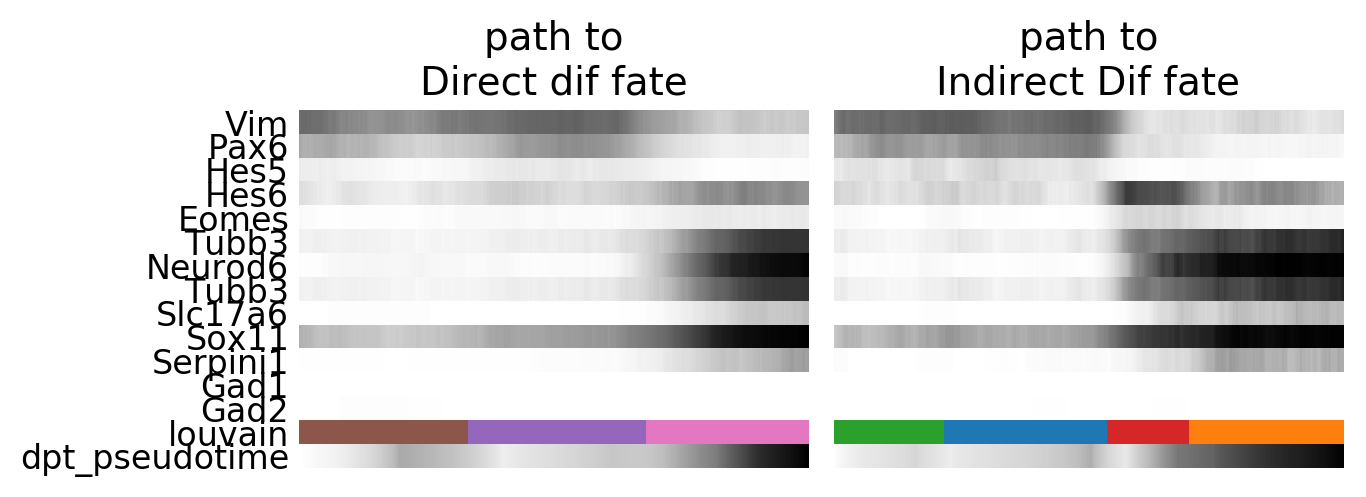

In [551]:
paths = [('Direct diff', [5, 4, 6]),  # use the category indices instead of the cluster names
         ('Indirect Diff', [2, 0, 3, 1])]
_, axs = pl.subplots(ncols=2, figsize=(6, 2.5), gridspec_kw={'wspace': 0.05, 'left': 0.11})
pl.subplots_adjust(left=0.05, right=0.98, top=0.82, bottom=0.2)
for ipath, (descr, path) in enumerate(paths):
    _, data = sc.pl.paga_path(
        adata, path, gene_names,                         
        show_node_names=False,
        ax=axs[ipath],
        ytick_fontsize=12,
        left_margin=0.15,
        n_avg=50,
        show_yticks=True if ipath==0 else False,
        show_colorbar=False,
        color_map='Greys',                             
        title='path to\n{} fate'.format(descr[:-1]),
        return_data=True,
        show=False)
    data.to_csv('./write/paga_path_{}.csv'.format(descr))

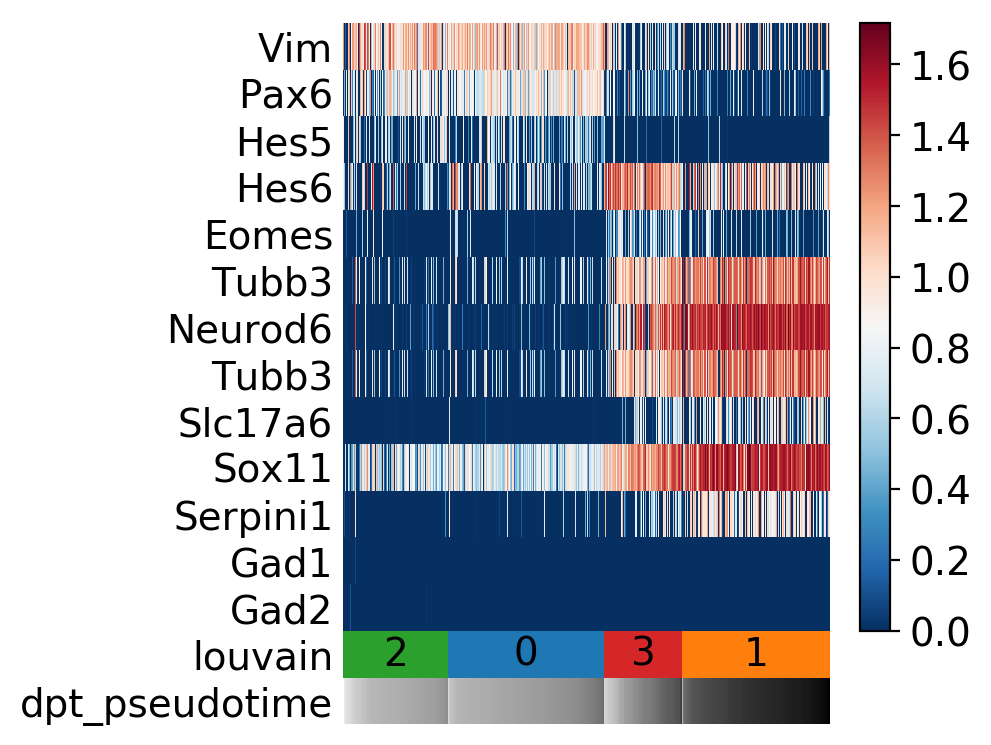

In [553]:
sc.pl.paga_path(adata, [2,0,3,1], gene_names)